In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reads csv files in the folder My Drive/DA Bootcamp/_DA-project_/datasets/
raw_population = pd.read_csv('../datasets/population.csv')
raw_transports = pd.read_csv('../datasets/transports.csv') 

In [3]:
raw_population.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [4]:
raw_transports.head()

,Code,Transport,Longitude,Latitude,Station,District.Name,Neighborhood.Name
0,K001,Underground,2.119370,41.399203,FGC (L6) - REINA ELISENDA (Sortida Duquesa d'O...,Sarrià-Sant Gervasi,Sarrià
1,K001,Underground,2.135427,41.397791,FGC (L6) - LA BONANOVA-,Sarrià-Sant Gervasi,Sant Gervasi - Galvany
2,K001,Underground,2.185391,41.451492,METRO (L11) - CASA DE L'AIGUA (C. Vila-Real)-,Nou Barris,la Trinitat Nova
3,K001,Underground,2.174473,41.460889,METRO (L11) - CIUTAT MERIDIANA (C. Pedraforca)-,Nou Barris,Ciutat Meridiana
4,K001,Underground,2.168588,41.387200,METRO (L1) - CATALUNYA (Rda. Universitat)-,Eixample,la Dreta de l'Eixample


In [5]:
# simplifications of the datasets

In [6]:
# population only of 2017,
population = raw_population[raw_population['Year']==2017]
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14016 entries, 0 to 14015
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               14016 non-null  int64 
 1   District.Code      14016 non-null  int64 
 2   District.Name      14016 non-null  object
 3   Neighborhood.Code  14016 non-null  int64 
 4   Neighborhood.Name  14016 non-null  object
 5   Gender             14016 non-null  object
 6   Age                14016 non-null  object
 7   Number             14016 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 985.5+ KB


In [7]:
population.duplicated().sum()

np.int64(803)

In [8]:
#cleaning the datasets
population.drop_duplicates(inplace=True)

In [9]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13213 entries, 0 to 14015
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               13213 non-null  int64 
 1   District.Code      13213 non-null  int64 
 2   District.Name      13213 non-null  object
 3   Neighborhood.Code  13213 non-null  int64 
 4   Neighborhood.Name  13213 non-null  object
 5   Gender             13213 non-null  object
 6   Age                13213 non-null  object
 7   Number             13213 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 929.0+ KB


In [10]:
population.duplicated().sum()

np.int64(0)

In [11]:
raw_transports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               651 non-null    object 
 1   Transport          651 non-null    object 
 2   Longitude          651 non-null    float64
 3   Latitude           651 non-null    float64
 4   Station            651 non-null    object 
 5   District.Name      487 non-null    object 
 6   Neighborhood.Name  487 non-null    object 
dtypes: float64(2), object(5)
memory usage: 35.7+ KB


In [12]:
transports = raw_transports.dropna(inplace=False)

In [13]:
transports.isnull().sum()

Code                 0
Transport            0
Longitude            0
Latitude             0
Station              0
District.Name        0
Neighborhood.Name    0
dtype: int64

In [14]:
# dropping columns: Year, District.Code, Neighbourhood.Code, Gender and Age
# transport dropping: Code, Longitude, Latitude, Station
population.drop(columns=['Year', 'District.Code', 'Neighborhood.Code', 'Gender', 'Age'], inplace=True)
transports.drop(columns=['Code', 'Longitude', 'Latitude', 'Station'], inplace=True)

In [15]:
population.head()

,District.Name,Neighborhood.Name,Number
0,Ciutat Vella,el Raval,224
1,Ciutat Vella,el Barri Gòtic,50
2,Ciutat Vella,la Barceloneta,43
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",95
4,Eixample,el Fort Pienc,124


In [16]:
transports.head()

,Transport,District.Name,Neighborhood.Name
0,Underground,Sarrià-Sant Gervasi,Sarrià
1,Underground,Sarrià-Sant Gervasi,Sant Gervasi - Galvany
2,Underground,Nou Barris,la Trinitat Nova
3,Underground,Nou Barris,Ciutat Meridiana
4,Underground,Eixample,la Dreta de l'Eixample


In [17]:
population.groupby(['District.Name','Neighborhood.Name'])['Number'].sum(numeric_only=True).reset_index()

,District.Name,Neighborhood.Name,Number
0,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",22058
1,Ciutat Vella,el Barri Gòtic,15252
2,Ciutat Vella,el Raval,46929
3,Ciutat Vella,la Barceloneta,13993
4,Eixample,Sant Antoni,36344
...,...,...,...
68,Sarrià-Sant Gervasi,Sant Gervasi - la Bonanova,24901
69,Sarrià-Sant Gervasi,Sarrià,23962
70,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",4267
71,Sarrià-Sant Gervasi,el Putxet i el Farró,28828


In [18]:
population_district= population.groupby(['District.Name'], as_index=False)['Number'].sum()
population_district

,District.Name,Number
0,Ciutat Vella,98232
1,Eixample,258152
2,Gràcia,117227
3,Horta-Guinardó,161921
4,Les Corts,79888
5,Nou Barris,159214
6,Sant Andreu,143246
7,Sant Martí,227989
8,Sants-Montjuïc,174478
9,Sarrià-Sant Gervasi,143967


In [19]:
transports=transports.groupby(['Transport', 'District.Name', 'Neighborhood.Name'])['Transport'].size().reset_index(name='Transport.Count')
transports

,Transport,District.Name,Neighborhood.Name,Transport.Count
0,Airport train,Eixample,la Dreta de l'Eixample,1
1,Airport train,Sant Andreu,Sant Andreu,1
2,Airport train,Sant Martí,el Clot,3
3,Airport train,Sants-Montjuïc,Sants,1
4,Cableway,Ciutat Vella,el Raval,1
...,...,...,...,...
97,Underground,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,10
98,Underground,Sarrià-Sant Gervasi,Sant Gervasi - la Bonanova,1
99,Underground,Sarrià-Sant Gervasi,Sarrià,4
100,Underground,Sarrià-Sant Gervasi,el Putxet i el Farró,6


In [20]:
transports_district = transports.groupby(['Transport', 'District.Name'], as_index=False)['Transport.Count'].sum()
transports_district

,Transport,District.Name,Transport.Count
0,Airport train,Eixample,1
1,Airport train,Sant Andreu,1
2,Airport train,Sant Martí,3
3,Airport train,Sants-Montjuïc,1
4,Cableway,Ciutat Vella,2
5,Cableway,Sants-Montjuïc,3
6,Funicular,Sants-Montjuïc,2
7,Funicular,Sarrià-Sant Gervasi,4
8,Maritime station,Ciutat Vella,2
9,Maritime station,Sants-Montjuïc,5


In [21]:
population_transport = pd.merge(population, transports, on = ['District.Name', 'Neighborhood.Name'], how='left')
population_transport

,District.Name,Neighborhood.Name,Number,Transport,Transport.Count
0,Ciutat Vella,el Raval,224,Cableway,1.0
1,Ciutat Vella,el Raval,224,Underground,13.0
2,Ciutat Vella,el Barri Gòtic,50,Maritime station,1.0
3,Ciutat Vella,el Barri Gòtic,50,Underground,3.0
4,Ciutat Vella,la Barceloneta,43,Cableway,1.0
...,...,...,...,...,...
19653,Sant Martí,el Besòs i el Maresme,41,Tram,3.0
19654,Sant Martí,el Besòs i el Maresme,41,Underground,7.0
19655,Sant Martí,Provençals del Poblenou,28,Tram,5.0
19656,Sant Martí,Sant Martí de Provençals,57,Underground,6.0


In [22]:
population_transport_district = pd.merge(population_district, transports_district, on = ['District.Name'], how='left')
population_transport_district

,District.Name,Number,Transport,Transport.Count
0,Ciutat Vella,98232,Cableway,2
1,Ciutat Vella,98232,Maritime station,2
2,Ciutat Vella,98232,RENFE,1
3,Ciutat Vella,98232,Underground,22
4,Eixample,258152,Airport train,1
5,Eixample,258152,RENFE,8
6,Eixample,258152,Railway (FGC),7
7,Eixample,258152,Tram,1
8,Eixample,258152,Underground,103
9,Gràcia,117227,Railway (FGC),2


In [23]:
transport_district_all = transports.groupby(['District.Name'], as_index=False)['Transport.Count'].sum()
transport_district_all

,District.Name,Transport.Count
0,Ciutat Vella,27
1,Eixample,120
2,Gràcia,17
3,Horta-Guinardó,31
4,Les Corts,24
5,Nou Barris,39
6,Sant Andreu,40
7,Sant Martí,70
8,Sants-Montjuïc,53
9,Sarrià-Sant Gervasi,66


In [25]:
population_transport_num = pd.merge(population_district, transport_district_all, on = ['District.Name'], how='left')
population_transport_num

,District.Name,Number,Transport.Count
0,Ciutat Vella,98232,27
1,Eixample,258152,120
2,Gràcia,117227,17
3,Horta-Guinardó,161921,31
4,Les Corts,79888,24
5,Nou Barris,159214,39
6,Sant Andreu,143246,40
7,Sant Martí,227989,70
8,Sants-Montjuïc,174478,53
9,Sarrià-Sant Gervasi,143967,66


In [28]:
correlation = population_transport_num['Number'].corr(population_transport_num['Transport.Count'])
print(f'Correlation between population and transport lines: {correlation}')

Correlation between population and transport lines: 0.8645963247544386


In [45]:
sns.set_palette("pastel")

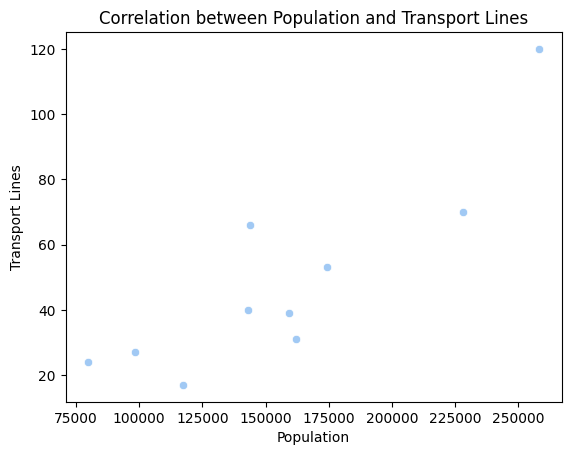

<Figure size 4000x800 with 0 Axes>

In [46]:
# Scatter plot to visualize correlation
sns.scatterplot(x='Number', y='Transport.Count', data=population_transport_num)
plt.title('Correlation between Population and Transport Lines')
plt.xlabel('Population')
plt.ylabel('Transport Lines')

# Adjust figure size to make it wider
plt.figure(figsize=(40, 8))  # You can change the width (12) as needed
plt.show()

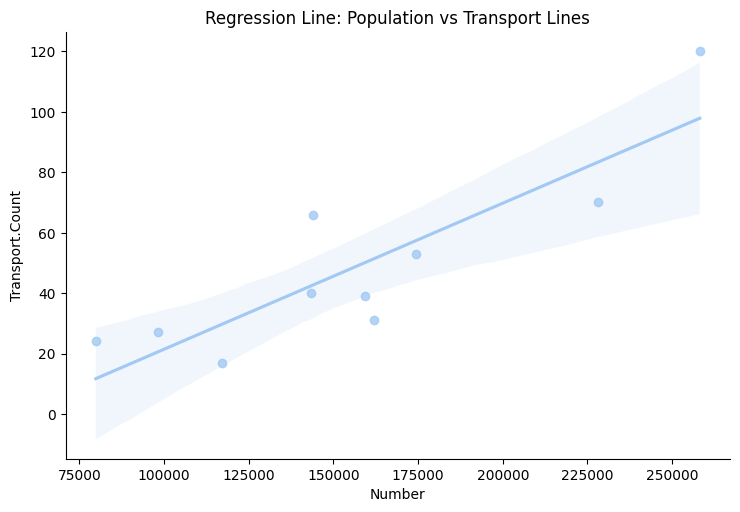

In [47]:
sns.lmplot(x='Number', y='Transport.Count', data=population_transport_num, height = 5, aspect= 1.5)
plt.title('Regression Line: Population vs Transport Lines')
plt.show()

In [49]:
district_pivoted = population_transport_district.pivot_table(index='District.Name', 
                                                             columns='Transport', 
                                                             values='Transport.Count', 
                                                             aggfunc ='sum', fill_value=0)
district_pivoted

Transport,Airport train,Cableway,Funicular,Maritime station,RENFE,Railway (FGC),Tram,Underground
District.Name,,,,,,,,
Ciutat Vella,0,2,0,2,1,0,0,22
Eixample,1,0,0,0,8,7,1,103
Gràcia,0,0,0,0,0,2,0,15
Horta-Guinardó,0,0,0,0,0,0,0,31
Les Corts,0,0,0,0,0,0,9,15
Nou Barris,0,0,0,0,1,0,0,38
Sant Andreu,1,0,0,0,3,0,0,36
Sant Martí,3,0,0,0,3,0,16,48
Sants-Montjuïc,1,3,2,5,1,2,0,39


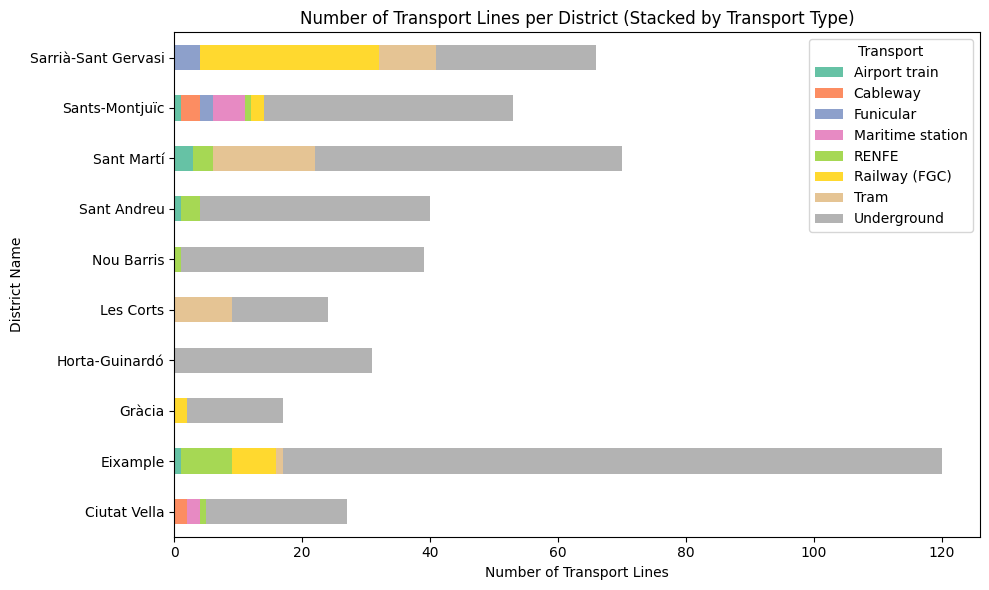

In [52]:
# Plotting the stacked bar plot
district_pivoted.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Set2')

# Adding titles and labels
plt.title('Number of Transport Lines per District (Stacked by Transport Type)')
plt.xlabel('Number of Transport Lines')
plt.ylabel('District Name')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [54]:
population_district_piv = pd.merge(district_pivoted, population_district, on=['District.Name'], how= 'left')
population_district_piv

,District.Name,Airport train,Cableway,Funicular,Maritime station,RENFE,Railway (FGC),Tram,Underground,Number
0,Ciutat Vella,0,2,0,2,1,0,0,22,98232
1,Eixample,1,0,0,0,8,7,1,103,258152
2,Gràcia,0,0,0,0,0,2,0,15,117227
3,Horta-Guinardó,0,0,0,0,0,0,0,31,161921
4,Les Corts,0,0,0,0,0,0,9,15,79888
5,Nou Barris,0,0,0,0,1,0,0,38,159214
6,Sant Andreu,1,0,0,0,3,0,0,36,143246
7,Sant Martí,3,0,0,0,3,0,16,48,227989
8,Sants-Montjuïc,1,3,2,5,1,2,0,39,174478
9,Sarrià-Sant Gervasi,0,0,4,0,0,28,9,25,143967


In [57]:
population_district_piv.columns

Index(['District.Name', 'Airport train', 'Cableway', 'Funicular',
       'Maritime station', 'RENFE', 'Railway (FGC)', 'Tram', 'Underground',
       'Number'],
      dtype='object')

In [65]:
population_district_piv.set_index('District.Name')

,Airport train,Cableway,Funicular,Maritime station,RENFE,Railway (FGC),Tram,Underground,Number
District.Name,,,,,,,,,
Ciutat Vella,0,2,0,2,1,0,0,22,98232
Eixample,1,0,0,0,8,7,1,103,258152
Gràcia,0,0,0,0,0,2,0,15,117227
Horta-Guinardó,0,0,0,0,0,0,0,31,161921
Les Corts,0,0,0,0,0,0,9,15,79888
Nou Barris,0,0,0,0,1,0,0,38,159214
Sant Andreu,1,0,0,0,3,0,0,36,143246
Sant Martí,3,0,0,0,3,0,16,48,227989
Sants-Montjuïc,1,3,2,5,1,2,0,39,174478


In [68]:
population_district_piv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   District.Name     10 non-null     object
 1   Airport train     10 non-null     int64 
 2   Cableway          10 non-null     int64 
 3   Funicular         10 non-null     int64 
 4   Maritime station  10 non-null     int64 
 5   RENFE             10 non-null     int64 
 6   Railway (FGC)     10 non-null     int64 
 7   Tram              10 non-null     int64 
 8   Underground       10 non-null     int64 
 9   Number            10 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 932.0+ bytes


In [67]:
# Calculate the correlation for each district between Population and each transport type
correlation_by_district = population_district_piv.apply(lambda row: row.corr(population_district_piv['Number']), axis=1)

# Display the correlation results for each district
print(correlation_by_district)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
dtype: float64


In [71]:
corr_rail = population_district_piv['Number'].corr(population_district_piv['Railway (FGC)'])
print(f'Correlation between population and railway transport lines: {corr_rail}')
corr_tram = population_district_piv['Number'].corr(population_district_piv['Tram'])
print(f'Correlation between population and tram transport lines: {corr_tram}')
corr_und = population_district_piv['Number'].corr(population_district_piv['Underground'])
print(f'Correlation between population and underground transport lines: {corr_und}')

Correlation between population and railway transport lines: 0.07444390165062471
Correlation between population and tram transport lines: 0.15764471164954214
Correlation between population and underground transport lines: 0.882823680939543


In [80]:
#Adding the bus stops dataset
# reads csv files in the folder My Drive/DA Bootcamp/_DA-project_/datasets/
bus = pd.read_csv('../datasets/bus_stops.csv') #My Drive/DA Bootcamp/_DA-project_/datasets/population.csv
# copy of the df before making any changes
raw_bus = bus.copy()

In [82]:
# cleaning the dataset
bus = raw_bus.dropna(inplace=False)
bus

,Code,Transport,Longitude,Latitude,Bus.Stop,District.Name,Neighborhood.Name
0,K014,Day bus stop,2.171619,41.413744,BUS -192--,Horta-Guinardó,el Guinardó
1,K014,Day bus stop,2.134902,41.420222,BUS -124--,Gràcia,Vallcarca i els Penitents
2,K014,Day bus stop,2.162913,41.423187,BUS -117--,Horta-Guinardó,la Font d'en Fargues
3,K014,Day bus stop,2.163667,41.422899,BUS -117--,Horta-Guinardó,la Font d'en Fargues
4,K014,Day bus stop,2.120212,41.397209,BUS -130--,Sarrià-Sant Gervasi,Sarrià
...,...,...,...,...,...,...,...
3157,K014,Day bus stop,2.183887,41.422024,BUS -191--,Sant Andreu,el Congrés i els Indians
3158,K014,Day bus stop,2.176710,41.446419,BUS -127-81--,Nou Barris,les Roquetes
3159,K015,Night bus stop,2.144596,41.411446,NITBUS -N4--,Gràcia,Vallcarca i els Penitents
3160,K014,Day bus stop,2.142256,41.371176,BUS -91-115-V5--,Sants-Montjuïc,la Bordeta


In [83]:
# simplifying dataset
bus.drop(columns=['Code', 'Longitude', 'Latitude', 'Bus.Stop'], inplace=True)
bus

,Transport,District.Name,Neighborhood.Name
0,Day bus stop,Horta-Guinardó,el Guinardó
1,Day bus stop,Gràcia,Vallcarca i els Penitents
2,Day bus stop,Horta-Guinardó,la Font d'en Fargues
3,Day bus stop,Horta-Guinardó,la Font d'en Fargues
4,Day bus stop,Sarrià-Sant Gervasi,Sarrià
...,...,...,...
3157,Day bus stop,Sant Andreu,el Congrés i els Indians
3158,Day bus stop,Nou Barris,les Roquetes
3159,Night bus stop,Gràcia,Vallcarca i els Penitents
3160,Day bus stop,Sants-Montjuïc,la Bordeta


In [84]:
bus=bus.groupby(['Transport', 'District.Name', 'Neighborhood.Name'])['Transport'].size().reset_index(name='Stops.Count')
bus

,Transport,District.Name,Neighborhood.Name,Stops.Count
0,Airport bus stop,Eixample,Sant Antoni,3
1,Airport bus stop,Eixample,la Dreta de l'Eixample,2
2,Airport bus stop,Sants-Montjuïc,Hostafrancs,1
3,Airport bus stop,Sants-Montjuïc,el Poble-sec,1
4,Bus station,Eixample,el Fort Pienc,1
...,...,...,...,...
147,Night bus stop,Sarrià-Sant Gervasi,Sant Gervasi - la Bonanova,14
148,Night bus stop,Sarrià-Sant Gervasi,Sarrià,22
149,Night bus stop,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",8
150,Night bus stop,Sarrià-Sant Gervasi,el Putxet i el Farró,20


In [85]:
bus_distr_pivoted = bus.pivot_table(index='District.Name', columns='Transport', 
                                                             values='Stops.Count', 
                                                             aggfunc ='sum', fill_value=0)
bus_distr_pivoted

Transport,Airport bus stop,Bus station,Day bus stop,Night bus stop
District.Name,,,,
Ciutat Vella,0,0,114,53
Eixample,5,1,245,154
Gràcia,0,0,166,44
Horta-Guinardó,0,0,309,80
Les Corts,0,0,162,45
Nou Barris,0,0,254,76
Sant Andreu,0,1,161,66
Sant Martí,0,0,235,121
Sants-Montjuïc,2,1,334,78


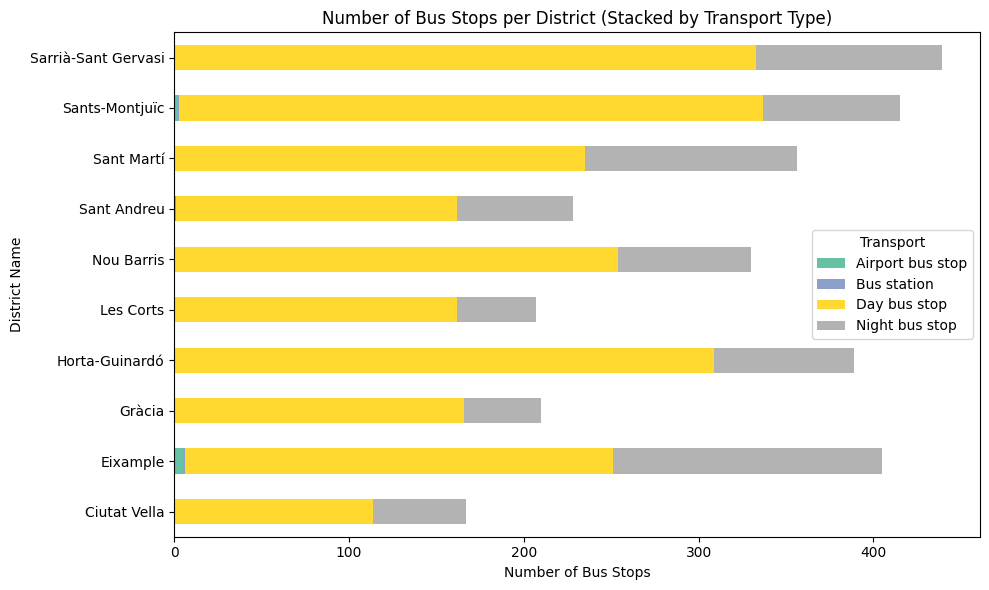

In [86]:
# Plotting the stacked bar plot
bus_distr_pivoted.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Set2')

# Adding titles and labels
plt.title('Number of Bus Stops per District (Stacked by Transport Type)')
plt.xlabel('Number of Bus Stops')
plt.ylabel('District Name')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [ ]:
#MERGE WITH THE POPULATION AND TRANSPORT DATA
